## TP1

### Exercice 1

In [2]:
import numpy as np
from math import floor
import time

arr = np.random.randint(0,100,10000)
sortedArr = np.array(arr)
sortedArr.sort()

def rechercheSequentielle(aTrouve, arr):
    for i in range(arr.size):
        if arr[i] == aTrouve:
            return True
    return False

def rechercheDichotomique(aTrouve, sortedArr):
    ret = False
    if sortedArr.size == 1:
        if sortedArr[0] == aTrouve:
            ret = True
    else:
        mid = floor(sortedArr.size/2)
        if sortedArr[mid] <= aTrouve:
            ret = rechercheDichotomique(aTrouve, sortedArr[mid:sortedArr.size])
        else:
            ret = rechercheDichotomique(aTrouve, sortedArr[0:mid+1])
    return ret


#### Cas d'un élément qui se trouve dans le tableau :

##### Recherche séquentielle :

In [15]:
nbExistant = 120
arr[0] = nbExistant
t1a = time.clock()
res = rechercheSequentielle(nbExistant, arr)
t2a = time.clock()
tma = t2a-t1a
print("Trouvé ?",res)
print("Temps d'exécution dans le meilleur cas :", tma, "s")
arr[0] = 0
arr[arr.size-1] = nbExistant
t1b = time.clock()
res = rechercheSequentielle(nbExistant, arr)
t2b = time.clock()
tmb = t2b-t1b
print("Trouvé ?",res)
print("Temps d'exécution dans le pire cas :", tmb, "s")
print("Temps moyen :",(tma+tmb)/2, "s")
arr[arr.size-1] = 0

Trouvé ? True
Temps d'exécution dans le meilleur cas : 3.779999997277628e-05 s
Trouvé ? True
Temps d'exécution dans le pire cas : 0.0019151999999849068 s
Temps moyen : 0.0009764999999788415 s


##### Recherche dichotomique :

In [3]:
nbExistant = 120
sortedArr[4684] = nbExistant
sortedArr.sort()
t1 = time.clock()
res = rechercheDichotomique(nbExistant, sortedArr)
t2 = time.clock()
print("Trouvé ?", res)
print("Temps d'exécution :",(t2-t1), "s")
sortedArr[4684] = 0
sortedArr.sort()

Trouvé ? True
Temps d'exécution : 0.0001227999999999993 s


#### Cas d'un élément qui ne se trouve pas dans le tableau

##### Recherche séquentielle : 

In [4]:
nbInexistant = 120
t1 = time.clock()
res = rechercheSequentielle(nbInexistant, arr)
t2 = time.clock()
print("Trouvé ?",res)
print("Temps d'exécution :", (t2-t1),"s")

Trouvé ? False
Temps d'exécution : 0.001977799999999995 s


On remarque que le temps ce temps d'exécution correspond à celui de la recherche dans le pire cas ce qui est logique car l'algorithme doit parcourir le tableau dans tout les cas.

##### Recherche dichotomique

In [5]:
nbInexistant = 140
t1 = time.clock()
res = rechercheDichotomique(nbInexistant,sortedArr)
t2 = time.clock()
print("Trouvé ?",res)
print("Temps d'exécution :",(t2-t1), "s")

Trouvé ? False
Temps d'exécution : 0.00010439999999999755 s


### Exercice 2

In [6]:
from numpy.random import randint as rand
import sys

size = 100
def generateMat2d(size):
    mat2d = np.zeros(shape=(size,size))
    for i in range(mat2d.shape[0]):
        for j in range(mat2d.shape[1]):
            if rand(0,100) < 80:
                mat2d[i][j] = rand(0,9)
    return mat2d
mat2d = generateMat2d(size)

def generateMat1d(size):
    mat1d = []
    for i in range(size):
        for j in range(size):
            if rand(0,100) < 80:
                mat1d.append((i,j,rand(0,9)))
    return mat1d
mat1d = generateMat1d(size)

def addMat2d(mat):
    ret = 0
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            ret += mat[i][j]
    return ret

def addMat1d(mat):
    ret = 0
    for i in range(len(mat)):
        ret += mat[i][2]
    return ret

print("Taille addMat2d :",sys.getsizeof(addMat2d),"octets")
print("Taille addMat1d :",sys.getsizeof(addMat1d),"octets")

t1 = time.clock()
print("Addition mat2d :",addMat2d(mat2d))
t2 = time.clock()
print("Temps calcul addMat2d :",(t2-t1),"s")

t1 = time.clock()
print("Addition mat1d :",addMat1d(mat1d))
t2 = time.clock()
print("Temps calcul addMat1d :",(t2-t1),"s")

Taille addMat2d : 136 octets
Taille addMat1d : 136 octets
Addition mat2d : 32004.0
Temps calcul addMat2d : 0.0025762000000000285 s
Addition mat1d : 31937
Temps calcul addMat1d : 0.0005558000000007723 s


Temps pour size = 10, mat2d : 0.001 s / mat1d : 0.0002 s

Temps pour size = 100, mat2d : 0.005 s / mat1d : 0.002 s

Temps pour size = 1000, mat2d : 0.4 s / mat1d : 0.1 s

In [8]:
mat2d10 = generateMat2d(10)
mat2d100 = generateMat2d(100)
mat2d1000 = generateMat2d(1000)

mat1d10 = generateMat1d(10)
mat1d100 = generateMat1d(100)
mat1d1000 = generateMat1d(1000)

In [9]:
def mat2dProduct(mat1,mat2):
    if (mat1.shape[0] == mat2.shape[1]) and (mat1.shape[1] == mat1.shape[0]):
        mat2T = mat2.transpose()
        ret = np.zeros((mat1.shape[0],mat2.shape[1]))
        for i in range(mat1.shape[0]):
            for j in range(mat2.shape[1]):
                ret[i][j] = np.sum(mat1[i] * mat2T[j])
        return ret
    else:
        return False

def mat1dProduct(mat1,mat2):
    if len(mat1) == len(mat2):
        ret = []
        for i in range(len(mat1)):
            ret.append((mat1[i][0],mat1[i][1],(mat1[i][2]*mat2[i][2])))
        return ret
    else:
        return False

graph2d = []
t1 = time.clock()
v = mat2dProduct(mat2d10,mat2d10)
t2 = time.clock()
graph2d.append(("2d10",(t2-t1)))
t1 = time.clock()
v = mat2dProduct(mat2d100,mat2d100)
t2 = time.clock()
graph2d.append(("2d100",(t2-t1)))
t1 = time.clock()
v = mat2dProduct(mat2d1000,mat2d1000)
t2 = time.clock()
graph2d.append(("2d1000",(t2-t1)))

graph1d = []
t1 = time.clock()
v = mat1dProduct(mat1d10,mat1d10)
t2 = time.clock()
graph1d.append(("1d10",(t2-t1)))
t1 = time.clock()
v = mat1dProduct(mat1d100,mat1d100)
t2 = time.clock()
graph1d.append(("1d100",(t2-t1)))
t1 = time.clock()
v = mat1dProduct(mat1d1000,mat1d1000)
t2 = time.clock()
graph1d.append(("1d100",(t2-t1)))

graph = [graph2d,graph1d]
print(graph)

[[('2d10', 0.0005154000000118231), ('2d100', 0.039094000000005735), ('2d1000', 7.938279200000011)], [('1d10', 0.0007310000000018135), ('1d100', 0.001967899999982592), ('1d100', 0.20525420000001304)]]


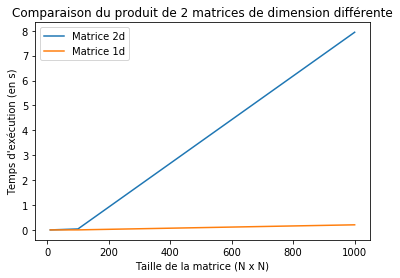

In [11]:
import matplotlib.pyplot as plt

x1 = [10,100,1000]
y1 = [graph[0][0][1],graph[0][1][1],graph[0][2][1]]
x2 = [10,100,1000]
y2 = [graph[1][0][1],graph[1][1][1],graph[1][2][1]]

plt.plot(x1, y1, label = "Matrice 2d")
plt.plot(x2, y2, label = "Matrice 1d")
plt.xlabel('Taille de la matrice (N x N)')
plt.ylabel("Temps d'exécution (en s)")  
plt.title('Comparaison du produit de 2 matrices de dimension différente') 
plt.legend() 
plt.show() 

### Exercice 3

In [42]:
def partitionRec(arr,indice,until):
    if indice == len(arr):
        if until == len(arr)-1:
            return False
        return partitionRec(arr,0,until+1)
    if sum(arr[indice:until]) == (sum(arr) - sum(arr[indice:until])):
        ret = list(arr)
        del(ret[indice:until])
        return [arr[indice:until],ret]
    return partitionRec(arr,indice+1,until)
        
arr = [1,4,2,6,3,4]
def partition(arr):
    ret = list(arr)
    ret.sort()
    return partitionRec(ret,0,0)
print(partition(arr))

[[1, 2, 3, 4], [4, 6]]


### Exercice 4

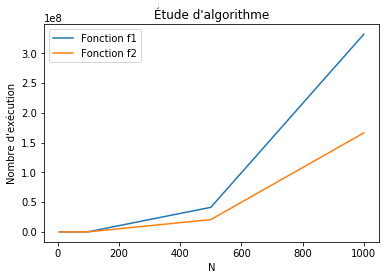

In [10]:
def f1(n):
    ret = 0
    for i in range(1, n-1):
        for j in range(i+1,n):
            for k in range(1,j):
                ret = ret + 1
    return ret

def f2(n):
    ret = 0
    for i in range(1,n):
        for j in range(1,i):
            for k in range(j,i):
                ret = ret + 1
    return ret

x1 = [5,10,50,100,500,1000]
y1 = []
for i in range(len(x1)):
    y1.append(f1(x1[i]))

x2 = [5,10,50,100,500,1000]
y2 = []
for i in range(len(x2)):
    y2.append(f2(x2[i]))
    
plt.plot(x1, y1, label = "Fonction f1")
plt.plot(x2, y2, label = "Fonction f2")
plt.xlabel('N')
plt.ylabel("Nombre d'exécution")  
plt.title("Étude d'algorithme") 
plt.legend() 
plt.show() 